In [1]:
# Import necessary packages
import os
import pathlib

import geopandas as gpd # Working with vector data
import matplotlib.pyplot as plt

In [2]:
# Set up a project data directory
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat-suitability'
)

os.makedirs(data_dir, exist_ok=True)

data_dir

'C:\\Users\\riede\\earth-analytics\\data\\habitat-suitability'

## Define study area:

* Download the USFS National Grassland Units

* Select study sites: Caddo National Grasslands and Sheyenne National Grasslands
    * Caddo National Grasslands is mainly in Texas, USA, although a small portion of it is in Oklahoma too. It includes two units: Bois d' Arc Creek Unit (13,360 acres) and Ladonia Unit (2,780 acres)<sup>2</sup> and 3 lakes: Lake Coffee Mill (651 acres), Lake Crockett (388 acres), and Lake Fannin (45 acres)<sup>1</sup>. In the Caddo Grasslands, several recreational activities are available such as camping, picnicking, and fishing.<sup>1</sup> The Caddo is also home to wildlife such as coyotes, waterfowl, turkey, largemouth bass, and sunfish.<sup>1</sup> 
    * According to the US Forest Service Sheyenne National Grasslands website, the Sheyenne National Grasslands are in the southeastern corner of North Dakota, USA and include 70,180 acres of public land amid 64,769 acres of private land. Camping, hiking, hunting, and backpacking are available as well as other recreational activities. This tallgrass prairie is home to prairie chickens, the Dakota skipper (a small butterfly), the Regal Fritillary (another type of butterfly), ferns, and the western prairie fringed orchid.<sup>3</sup>

* Citations:
    1. “Caddo-LBJ National Grasslands.” National Forests and Grasslands in Texas, U.S. Forest Service, U.S. Department of Agriculture, www.fs.usda.gov/detail/texas/about-forest/districts/?cid=fswdev3_008440. Accessed 2 Dec. 2024. 
    2. Caddo National Grasslands WMA, Texas Parks and Wildlife Department, tpwd.texas.gov/huntwild/hunt/wma/find_a_wma/list/?id=4. Accessed 2 Dec. 2024.
    3. “Sheyenne National Grassland.” Dakota Prairie Grasslands, U.S. Forest Service, U.S. Department of Agriculture, www.fs.usda.gov/recarea/dpg/recarea/?recid=79470. Accessed 2 Dec. 2024. 


,OBJECTID,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE.AREA,SHAPE.LEN,geometry
0,187245,281771010328,Fort Pierre National Grassland,209044.225,0.095149,1.455518,"POLYGON ((-100.0841 44.28163, -100.0841 44.278..."
1,187246,295507010328,Butte Valley National Grassland,19489.170,0.008557,0.853736,"MULTIPOLYGON (((-121.99601 41.84049, -121.9960..."
2,187247,295508010328,Kiowa National Grassland,144281.321,0.058543,9.858642,"MULTIPOLYGON (((-104.30415 36.08063, -104.3041..."
3,187248,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31082 46.51457, -97.3056 4..."
4,187249,295510010328,Cedar River National Grassland,6717.517,0.003157,0.999947,"MULTIPOLYGON (((-101.82222 45.95897, -101.8170..."
5,187250,295511010328,Black Kettle National Grassland,33103.349,0.013340,4.561060,"MULTIPOLYGON (((-99.9166 35.71892, -99.91662 3..."
6,187251,295512010328,Rita Blanca National Grassland,94127.091,0.038271,6.652113,"MULTIPOLYGON (((-102.62994 36.44073, -102.6298..."
7,187252,295513010328,Thunder Basin National Grassland,626249.208,0.282888,44.088050,"MULTIPOLYGON (((-105.46006 43.31909, -105.4601..."
8,187253,295514010328,McClellan Creek National Grassland,1401.715,0.000562,0.115902,"POLYGON ((-100.86004 35.20951, -100.86009 35.2..."
9,187254,295515010328,Caddo National Grassland,68479.549,0.026940,1.159342,"MULTIPOLYGON (((-95.85493 33.79814, -95.85495 ..."


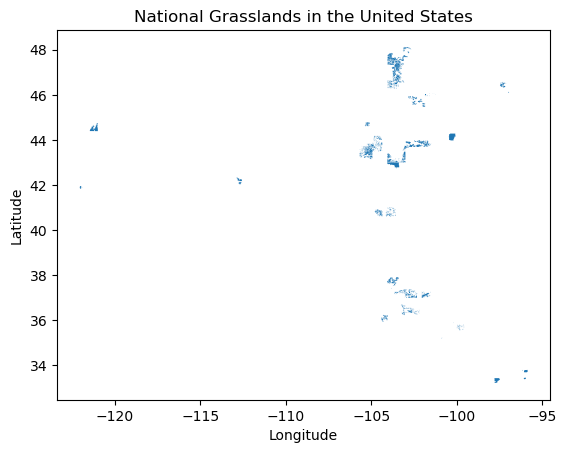

In [6]:
# Set up the grassland URL
grasslands_url = ("https://apps.fs.usda.gov/arcx/rest/services"
    "/EDW/EDW_NationalGrassland_01/MapServer/0"
    "/query?where=1%3D1&outFields=*&geometry=&geometry"
    "Type=esriGeometryEnvelope&inSR=4326&spatialRel=esriSpatialRelIntersects&outSR=4326&f=json")

# Set up a path to save the data on your machine
grasslands_dir = os.path.join(data_dir, 'grasslands_dir')

# Make the grasslands directory
os.makedirs(grasslands_dir, exist_ok=True)

# Join grasslands shapefile path
grasslands_path = os.path.join(grasslands_dir, 'S_USA.NationalGrassland.shp')

# Only download once
if not os.path.exists(grasslands_path):
    grasslands_gdf = gpd.read_file(grasslands_url)
    grasslands_gdf.to_file(grasslands_path)

# Check that the URL is correct
grasslands_gdf = gpd.read_file(grasslands_path)

# Display grasslands_gdf and plot grasslands to check download
display(grasslands_gdf)
national_grasslands_plot = grasslands_gdf.plot()
plt.title('National Grasslands in the United States')
national_grasslands_plot.set_xlabel('Longitude')
national_grasslands_plot.set_ylabel('Latitude')
plt.show()

,OBJECTID,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE.AREA,SHAPE.LEN,geometry
3,187248,295509010328,Sheyenne National Grassland,70428.175,0.033356,4.097398,"MULTIPOLYGON (((-97.31082 46.51457, -97.3056 4..."


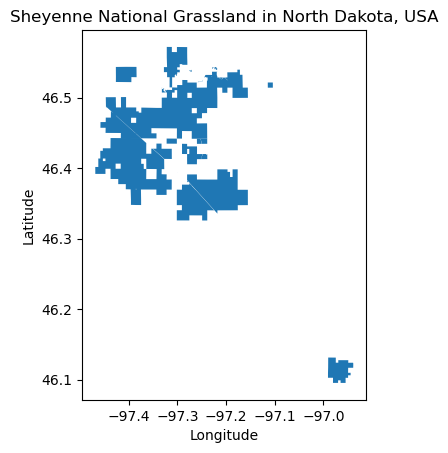

In [8]:
# Isolate Sheyenne National Grasslands from the grasslands_gdf
sheyenne_grasslands_gdf = grasslands_gdf[grasslands_gdf['GRASSLANDN']=='Sheyenne National Grassland']
display(sheyenne_grasslands_gdf)
sheyenne_grasslands_plot = sheyenne_grasslands_gdf.plot()
plt.title('Sheyenne National Grassland in North Dakota, USA')
sheyenne_grasslands_plot.set_xlabel('Longitude')
sheyenne_grasslands_plot.set_ylabel('Latitude')
plt.show()

,OBJECTID,NATIONALGR,GRASSLANDN,GIS_ACRES,SHAPE.AREA,SHAPE.LEN,geometry
9,187254,295515010328,Caddo National Grassland,68479.549,0.02694,1.159342,"MULTIPOLYGON (((-95.85493 33.79814, -95.85495 ..."


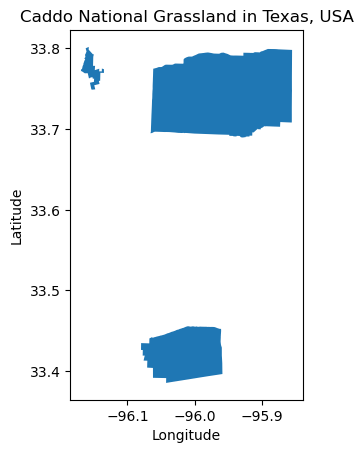

In [9]:
# Isolate Caddo National Grasslands from the grasslands_gdf
caddo_grasslands_gdf = grasslands_gdf[grasslands_gdf['GRASSLANDN']=='Caddo National Grassland']
display(caddo_grasslands_gdf)
caddo_grasslands_plot = caddo_grasslands_gdf.plot()
plt.title('Caddo National Grassland in Texas, USA')
caddo_grasslands_plot.set_xlabel('Longitude')
caddo_grasslands_plot.set_ylabel('Latitude')
plt.show()

In [10]:
%store sheyenne_grasslands_gdf caddo_grasslands_gdf data_dir

Stored 'sheyenne_grasslands_gdf' (GeoDataFrame)
Stored 'caddo_grasslands_gdf' (GeoDataFrame)
Stored 'data_dir' (str)
